In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pmdarima import auto_arima
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [2]:
df = pd.read_csv('AirPassengers.csv')
df

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


<function matplotlib.pyplot.show(close=None, block=None)>

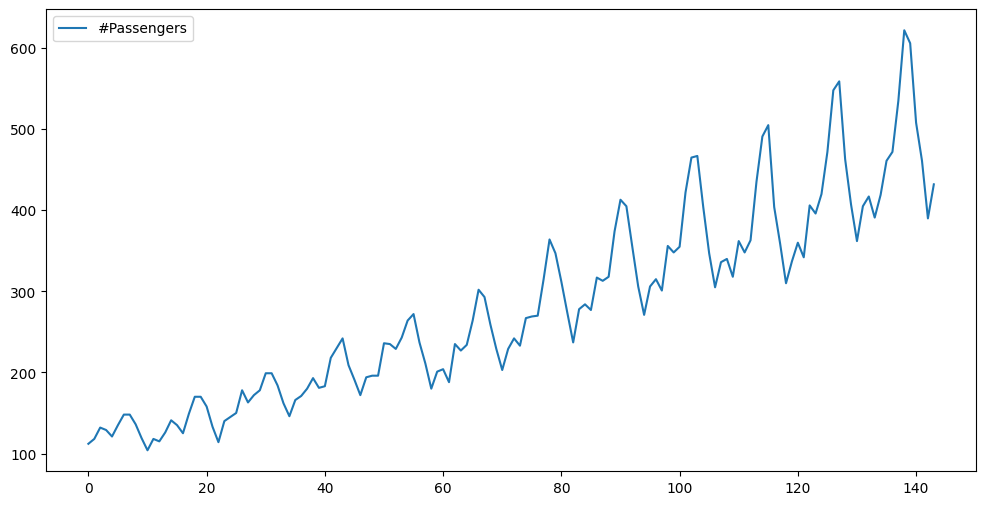

In [3]:
matplotlib.rcParams['figure.figsize']=[12,6]
df.plot()
plt.show

### Автокореляція

In [4]:
acf_values = acf(df['#Passengers'])
acf_values

array([1.        , 0.94804734, 0.87557484, 0.80668116, 0.75262542,
       0.71376997, 0.6817336 , 0.66290439, 0.65561048, 0.67094833,
       0.70271992, 0.74324019, 0.76039504, 0.71266087, 0.64634228,
       0.58592342, 0.53795519, 0.49974753, 0.46873401, 0.44987066,
       0.4416288 , 0.45722376])

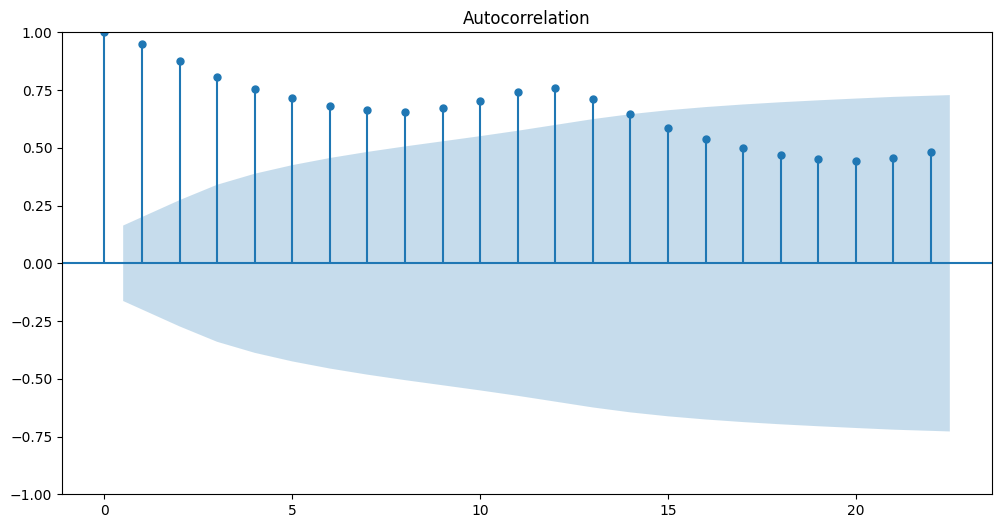

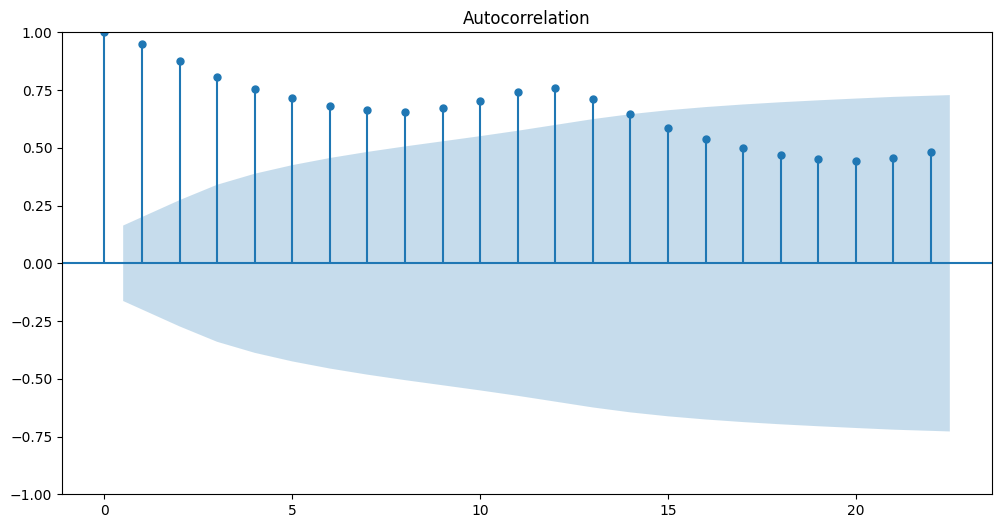

In [5]:
plot_acf(df['#Passengers'])

## Часткова автокореляція

In [6]:
pacf_values = pacf(df['#Passengers'])
pacf_values

array([ 1.        ,  0.95467704, -0.26527732,  0.05546955,  0.10885622,
        0.08112579,  0.00412541,  0.15616955,  0.10370833,  0.28878144,
        0.20691805,  0.2411297 , -0.15800498, -0.7183246 , -0.08948064,
        0.22160591,  0.13462253,  0.11561572,  0.1948294 ,  0.09665618,
       -0.20215868, -0.0936381 ])

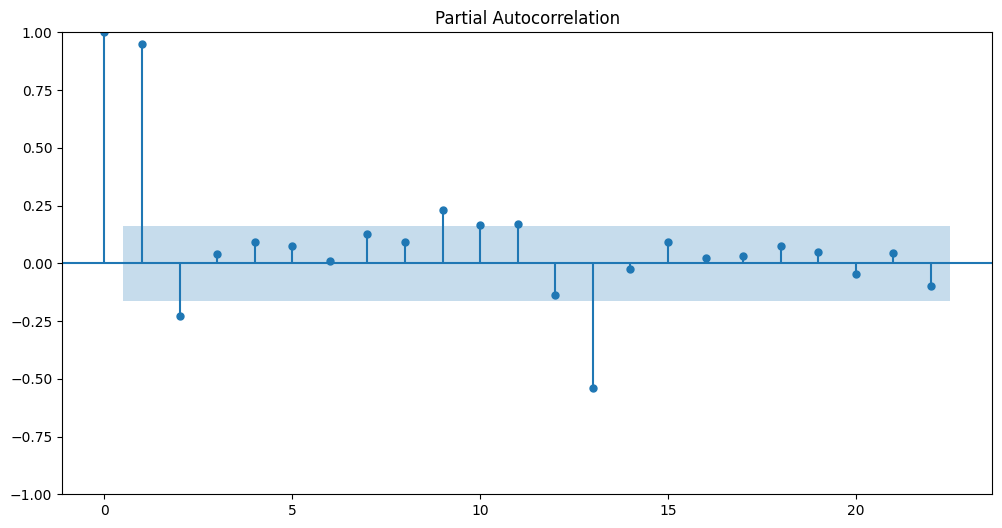

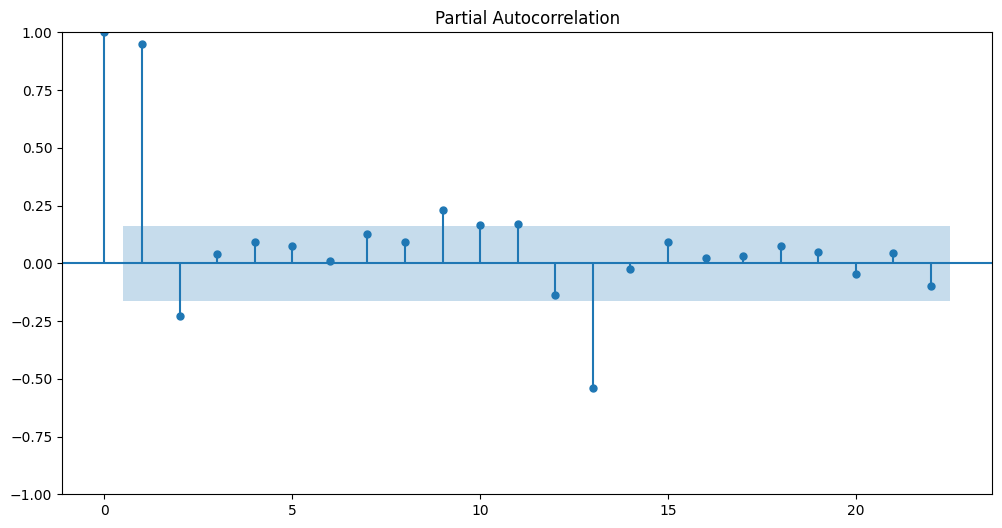

In [7]:
plot_pacf(df['#Passengers'])

In [8]:
import statsmodels.api as sa

# Модель ARIMA

In [9]:
train = df['#Passengers'][:114]
train

0      112
1      118
2      132
3      129
4      121
      ... 
109    318
110    362
111    348
112    363
113    435
Name: #Passengers, Length: 114, dtype: int64

In [10]:
model_ARIMA = sa.tsa.ARIMA(train).fit()

In [11]:
model_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                  114
Model:                          ARIMA   Log Likelihood                -672.489
Date:                Tue, 12 Sep 2023   AIC                           1348.978
Time:                        17:43:47   BIC                           1354.450
Sample:                             0   HQIC                          1351.199
                                - 114                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        237.7456      9.220     25.785      0.000     219.674     255.817
sigma2      7788.7366   1335.357      5.833      0.000    5171.486    1.04e+04
===================================================================================
Ljung-Box (L1) (Q):                 100.01   Jarque-Bera (JB):                 6.79
Prob(Q):                              0.00   Prob(JB):                         0.03
Heteroskedasticity (H):               1.51   Skew:                             0.54
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [12]:
pred_ARM = model_ARIMA.predict(114, 143, typ='levels')
pred_ARM.head()

114    237.745608
115    237.745608
116    237.745608
117    237.745608
118    237.745608
Name: predicted_mean, dtype: float64

<Axes: >

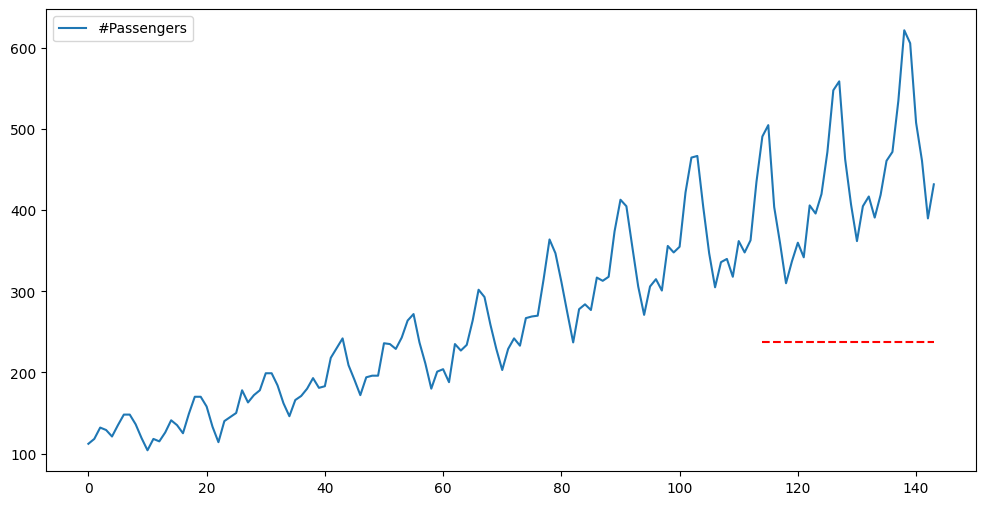

In [13]:
df.plot()
pred_ARM.plot(style='r--')

In [14]:
comp = df['#Passengers'][114:143]
comp.head()

114    491
115    505
116    404
117    359
118    310
Name: #Passengers, dtype: int64

In [15]:
#Метрики
mae_ARM = np.mean(np.abs(pred_ARM - comp))
rmse_ARM = np.sqrt(np.mean((pred_ARM - comp) ** 2))
print(f'MAE_ARM: {mae_ARM:.3f}')
print(f'RMSE_ARM: {rmse_ARM:.3f}')

MAE_ARM: 204.599
RMSE_ARM: 219.197


# Модель SARIMAX

In [17]:
parameters = auto_arima(train, seasonal=True, m=12, trace=True, suppress_warnings=True, error_action='ignore', stepwise=True)
parameters

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,1,1)[12]             : AIC=inf, Time=1.11 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=749.666, Time=0.01 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=746.994, Time=0.09 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=747.670, Time=0.12 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=746.999, Time=0.03 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=748.475, Time=0.23 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=748.774, Time=0.22 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=747.301, Time=0.12 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=1.36 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=748.578, Time=0.07 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=748.460, Time=0.12 sec
 ARIMA(1,1,1)(1,1,0)[12]             : AIC=747.923, Time=0.17 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=747.379, Time=0.09 sec
 ARIMA(2,1,1)(1,1,0)[12]             : AIC=749.897, Time=0.27 sec
 ARIMA(1,1,0)(1,1,0)[12] intercept   : AI

ARIMA(order=(1, 1, 0), scoring_args={}, seasonal_order=(1, 1, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [18]:
model_SARIMAX = sa.tsa.statespace.SARIMAX(train, order=(1,1,0), seasonal_order=(1,1,0,12)).fit()

In [19]:
model_SARIMAX.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                  114
Model:             SARIMAX(1, 1, 0)x(1, 1, 0, 12)   Log Likelihood                -370.497
Date:                            Tue, 12 Sep 2023   AIC                            746.994
Time:                                    17:45:08   BIC                            754.839
Sample:                                         0   HQIC                           750.170
                                            - 114                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1886      0.091     -2.073      0.038      -0.367      -0.010
ar.S.L12      -0.1449      0.083     -1.749      0.080      -0.307       0.017
sigma2        89.6411     13.913      6.443      0.000      62.372     116.910
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.89
Prob(Q):                              0.90   Prob(JB):                         0.24
Heteroskedasticity (H):               1.06   Skew:                             0.38
Prob(H) (two-sided):                  0.88   Kurtosis:                         2.68
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<Axes: >

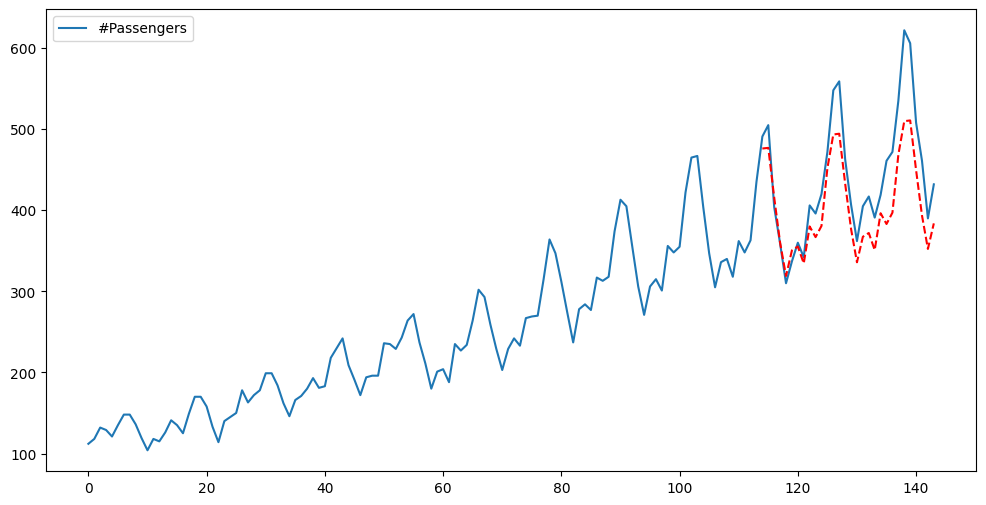

In [20]:
pred_SRX = model_SARIMAX.predict(114, 143)
df.plot()
pred_SRX.plot(style='r--')

In [21]:
#Метрики
mae_SRX = np.mean(np.abs(pred_SRX - comp))
rmse_SRX = np.sqrt(np.mean((pred_SRX - comp) ** 2))
print(f'MAE_SRX: {mae_SRX:.3f}')
print(f'RMSE_SRX: {rmse_SRX:.3f}')

MAE_SRX: 39.510
RMSE_SRX: 48.172


# Модель Хольта-Вінтерса

In [22]:
model_HLW = ExponentialSmoothing(train).fit()

<Axes: >

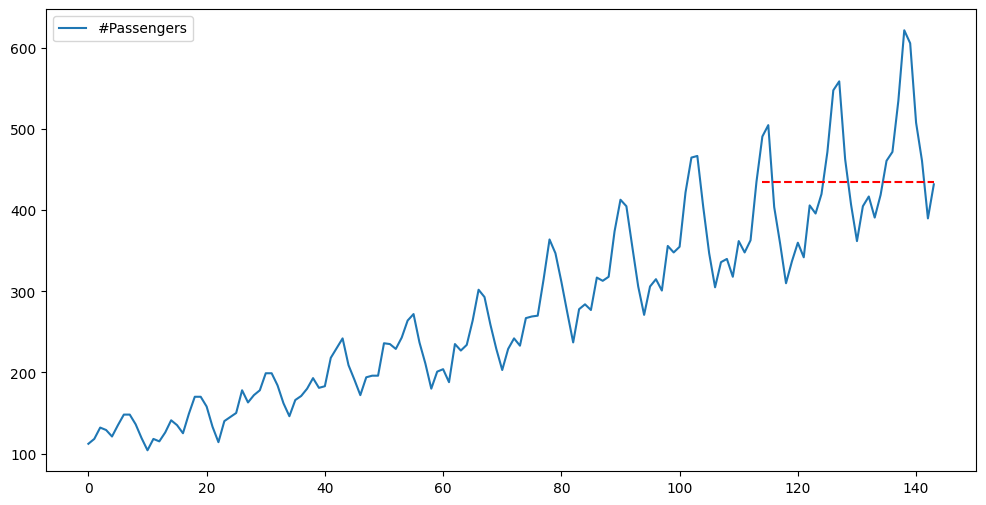

In [23]:
pred_HLW = model_HLW.predict(114, 143)
df.plot()
pred_HLW.plot(style = 'r--')

In [24]:
#Метрики
mae_HLW = np.mean(np.abs(pred_HLW - comp))
rmse_HLW = np.sqrt(np.mean((pred_HLW - comp) ** 2))
print(f'MAE_HLW: {mae_HLW:.3f}')
print(f'RMSE_HLW: {rmse_HLW:.3f}')

MAE_HLW: 64.894
RMSE_HLW: 79.031


# Порівняння метрики оцінки моделей

In [25]:
cmp = pd.DataFrame (
    {'Datasets':['AirPassengers.csv', 'Temperature.csv'], 'MAE_ARM':[round(mae_ARM,3), 3.400], 'RMSE_ARM':[round(rmse_ARM,3), 4.120],
     'MAE_SRX':[round(mae_SRX,3), 3.410], 'RMSE_SRX':[round(rmse_SRX,3), 4.139],
     'MAE_HLW':[round(mae_HLW,3), 3.920], 'RMSE_HLW':[round(rmse_HLW,3), 4.800]}
)
cmp


,Datasets,MAE_ARM,RMSE_ARM,MAE_SRX,RMSE_SRX,MAE_HLW,RMSE_HLW
0,AirPassengers.csv,204.599,219.197,39.51,48.172,64.894,79.031
1,Temperature.csv,3.400,4.120,3.41,4.139,3.920,4.800
